In [99]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [123]:
#preds = pd.read_csv('/neurospin/dico/jlaval/Output/5_models_FIP_left_3_layer_proj/16-34-28_0/FIP_left_custom_embeddings/Left_FIP/test_predicted_probas.csv')
preds = pd.read_csv('/neurospin/dico/jlaval/Output/5_models_FIP_right_3_layer_proj/pepper_05_4/FIP_right_custom_embeddings/Right_FIP/test_predicted_probas.csv')
#preds = pd.read_csv('/neurospin/dico/jlaval/Output/imagen_polar_left/13-39-38_135/imagen_random_embeddings/Left_Interrup_RS_CS/full_predicted_probas.csv') # BEST

In [124]:
preds

,Subject,label,proba_pred_0,label_pred_0,median_pred,mean_pred,average_model
0,100206,1,0.996451,1,0.996451,0.996451,0.996451
1,100307,1,0.801583,0,0.801583,0.801583,0.801583
2,100610,1,0.570834,0,0.570834,0.570834,0.570834
3,101309,1,0.778922,0,0.778922,0.778922,0.778922
4,101410,0,0.659910,0,0.659910,0.659910,0.659910
...,...,...,...,...,...,...,...
385,983773,1,0.991786,1,0.991786,0.991786,0.991786
386,984472,1,0.892569,1,0.892569,0.892569,0.892569
387,991267,1,0.993992,1,0.993992,0.993992,0.993992
388,993675,0,0.813546,0,0.813546,0.813546,0.813546


In [125]:
ba = balanced_accuracy_score(preds['label'], preds['label_pred_0'])
print(ba)
print(sum(preds['label']), sum(preds['label_pred_0']))
# where is threshold set ?
threshold = preds.loc[preds['label_pred_0']==1].sort_values(by='proba_pred_0')['proba_pred_0'].tolist()[0]
print(f'proba threshold: {threshold}')

0.7925925925925926
270 184
proba threshold: 0.8301456928264667


In [126]:
tn, fp, fn, tp = confusion_matrix(preds['label'], preds['label_pred_0']).ravel()
print(f"TN: {tn}, TP: {tp}, FN: {fn}, FP: {fp}")

TN: 112, TP: 176, FN: 94, FP: 8


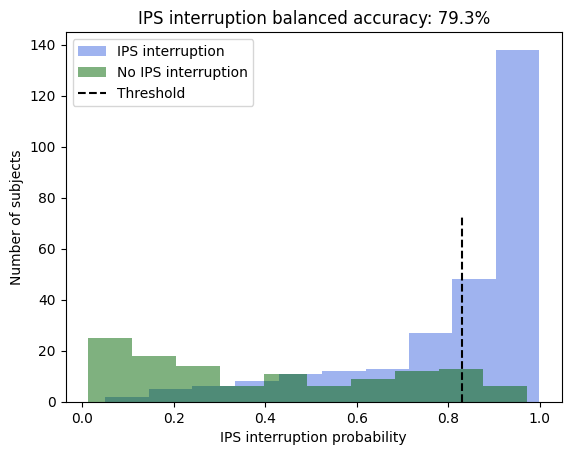

In [127]:
## plot proba distribs
plt.hist(preds.loc[preds['label']==1]['mean_pred'], color='royalblue', alpha=0.5, label='IPS interruption')
plt.hist(preds.loc[preds['label']==0]['mean_pred'], color='darkgreen', alpha=0.5, label='No IPS interruption')
plt.vlines(x = threshold, ymin=0, ymax=0.5*plt.gca().get_ylim()[1], color = 'k', label = 'Threshold', linestyles='--')
plt.xlabel('IPS interruption probability')
plt.ylabel('Number of subjects')
plt.legend()
plt.title(f'IPS interruption balanced accuracy: {ba*100:.1f}%')
plt.show()

In [93]:
## create a summary CSV with labels, and preds ?